In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

$R^2 = \frac{SSE}{SST} = 1 - \frac{SSR}{SST}$

where:
- SSE: Sum of Squared Explained which measures the unexplained variation in the dependent variable (the error).
- SSR: Sum of Squared Residuals which measures the variation in the dependent variable explained by the regression model.
- SST: Total Sum of Squares which measures the total variation in the dependent variable.

In [2]:
def calculate_r2(y_true, y_pred):
    """Calculates the R² value manually.

    Args:
        y_true: True values of the dependent variable.
        y_pred: Predicted values of the dependent variable.

    Returns:
        The R² value.
    """

    # Calculate mean of true values
    y_mean = np.mean(y_true)

    # Calculate SSR and SST
    SSR = np.sum((y_true - y_pred) ** 2)
    SST = np.sum((y_true - y_mean) ** 2)

    # Calculate R²
    r2 = 1 - SSR / SST
    return r2

$Adjusted R^2 = 1 - \frac{(1 - R²)(N -1)}{N - p -1}$

where:
- R²: Sample R-Squared
- N: Total sample size
- p: Number of independent variable

In [3]:
def calculate_adjusted_r2(y_true, y_pred, X):
    """Calculates the adjusted R-squared score.

    Args:
        y_true: True values of the dependent variable.
        y_pred: Predicted values of the dependent variable.
        X: Independent variables.

    Returns:
        The adjusted R-squared score.
    """

    r2 = calculate_r2(y_true, y_pred)
    n = len(y_true)
    p = X.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    return adjusted_r2

## Univariate

In [4]:
X = np.array((1, 2, 3, 4, 3.5))
y = np.array((3, 1, 4, 5, 4))

X = X.reshape((-1, 1))

print(X.shape)
print(y.shape)

(5, 1)
(5,)


0.8793103448275861 1.0258620689655173


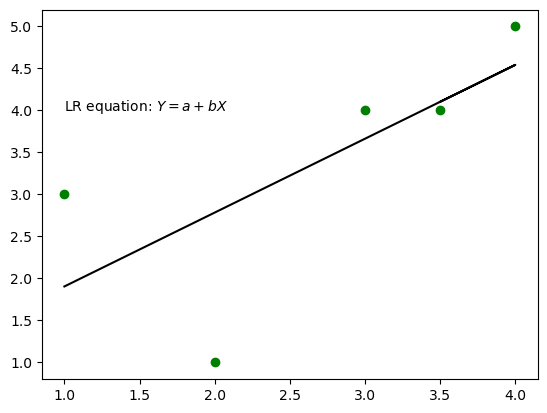

In [5]:
model = LinearRegression().fit(X, y)

fig = plt.figure()
ax = fig.add_subplot()
plt.scatter(X, y, color='g')
plt.plot(X, model.predict(X),color='k')
ax.text(1, 4, r'LR equation: $Y = a + bX$', fontsize=10)

print(model.coef_[0], model.intercept_)

In [6]:
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([0.87931034]),
 '_residues': 4.715517241379311,
 'rank_': 1,
 'singular_': array([2.40831892]),
 'intercept_': 1.0258620689655173}

In [7]:
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print("Coefficient of determination (R²):", r2)

Coefficient of determination (R²): 0.4874437781109444


In [8]:
# Make predictions
y_pred = model.predict(X)

# Calculate R² manually
r2_manual = calculate_r2(y, y_pred)
print("R² calculated manually:", r2_manual)

# Calculate Adjusted R² manually
r2_manual = calculate_adjusted_r2(y, y_pred, X)
print("Adjusted R² calculated manually:", r2_manual)

R² calculated manually: 0.4874437781109444
Adjusted R² calculated manually: 0.3165917041479259


## Multivariate

In [9]:
X = np.array([[1, 2], [3, 3], [3, 5], [4, 5], [5, 6]])
y = np.array([3, 5, 7, 9, 11])

In [10]:
print(X.shape)
print(y.shape)

(5, 2)
(5,)


In [11]:
model = LinearRegression().fit(X, y)

In [12]:
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 2,
 'coef_': array([1.04545455, 1.        ]),
 '_residues': 1.1818181818181819,
 'rank_': 2,
 'singular_': array([4.31933281, 0.97126931]),
 'intercept_': -0.5454545454545485}

In [13]:
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print("Coefficient of determination (R²):", r2)

Coefficient of determination (R²): 0.9704545454545455


In [14]:
# Make predictions
y_pred = model.predict(X)

# Calculate R² manually
r2_manual = calculate_r2(y, y_pred)
print("R² calculated manually:", r2_manual)

# Calculate Adjusted R² manually
r2_manual = calculate_adjusted_r2(y, y_pred, X)
print("Adjusted R² calculated manually:", r2_manual)

R² calculated manually: 0.9704545454545455
Adjusted R² calculated manually: 0.9409090909090909
